In [22]:
import os, sys, argparse, importlib, time, inspect
import numpy as np
import matplotlib.pyplot as plt
import os.path as osp
if hasattr(__builtins__,'__IPYTHON__'):
    print('Notebook')
    from tqdm.notebook import tqdm
else:
    print('Not notebook')
    from tqdm import tqdm
from tensorflow.keras import backend as K
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
import tensorflow_probability as tfp

gpu_devices = tf.config.list_physical_devices('GPU') 
if len(gpu_devices) > 0:
    print("GPU detected")
    for i in range(len(gpu_devices)):
        tf.config.experimental.set_memory_growth(gpu_devices[i], True)
else:
    print('No GPU detected')

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import load_model, Model
import spektral
from sklearn.preprocessing import normalize
from spektral.data import DisjointLoader, BatchLoader, SingleLoader
from importlib import reload

import datetime as dt
import pandas as pd
os.chdir("../from_config") ######!!!!!!
import dev.testtraindata as dl
graph_data=dl.graph_data
from dev.metrics import energy_angle_zeniazi as metrics


Notebook
GPU detected


In [8]:
with tf.device('/cpu:0'):
    save_options = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
    model=tf.keras.models.load_model("trained_models/IceCube_neutrino/KHop_K[1,2]agmaxn_25_2htf2yxw", options=save_options)
model.compile()

In [9]:
os.chdir('..')
os.getcwd()
batch_size=512
dataset=graph_data(n_steps=10, n_neighbors=31, restart=False, traintest='test', i_test=5)
loader = DisjointLoader(dataset[:1000], batch_size=batch_size, epochs=1)
os.chdir('model_eval')
os.getcwd()

Loading test data 5 to memory


'C:\\Users\\chris\\Christian\\3YR-UNI\\Bachelor\\IceCube\\model_eval'

In [35]:
@tf.function(input_signature = loader.tf_signature(), experimental_relax_shapes = True)
def test_step(inputs, targets):
    predictions = model(inputs, training = False)
    targets     = tf.cast(targets, tf.float32) 

    return predictions, targets, 1

100%|██████████████████████████████████████████████████████████████████████████████████| 98/98 [01:17<00:00,  1.26it/s]
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


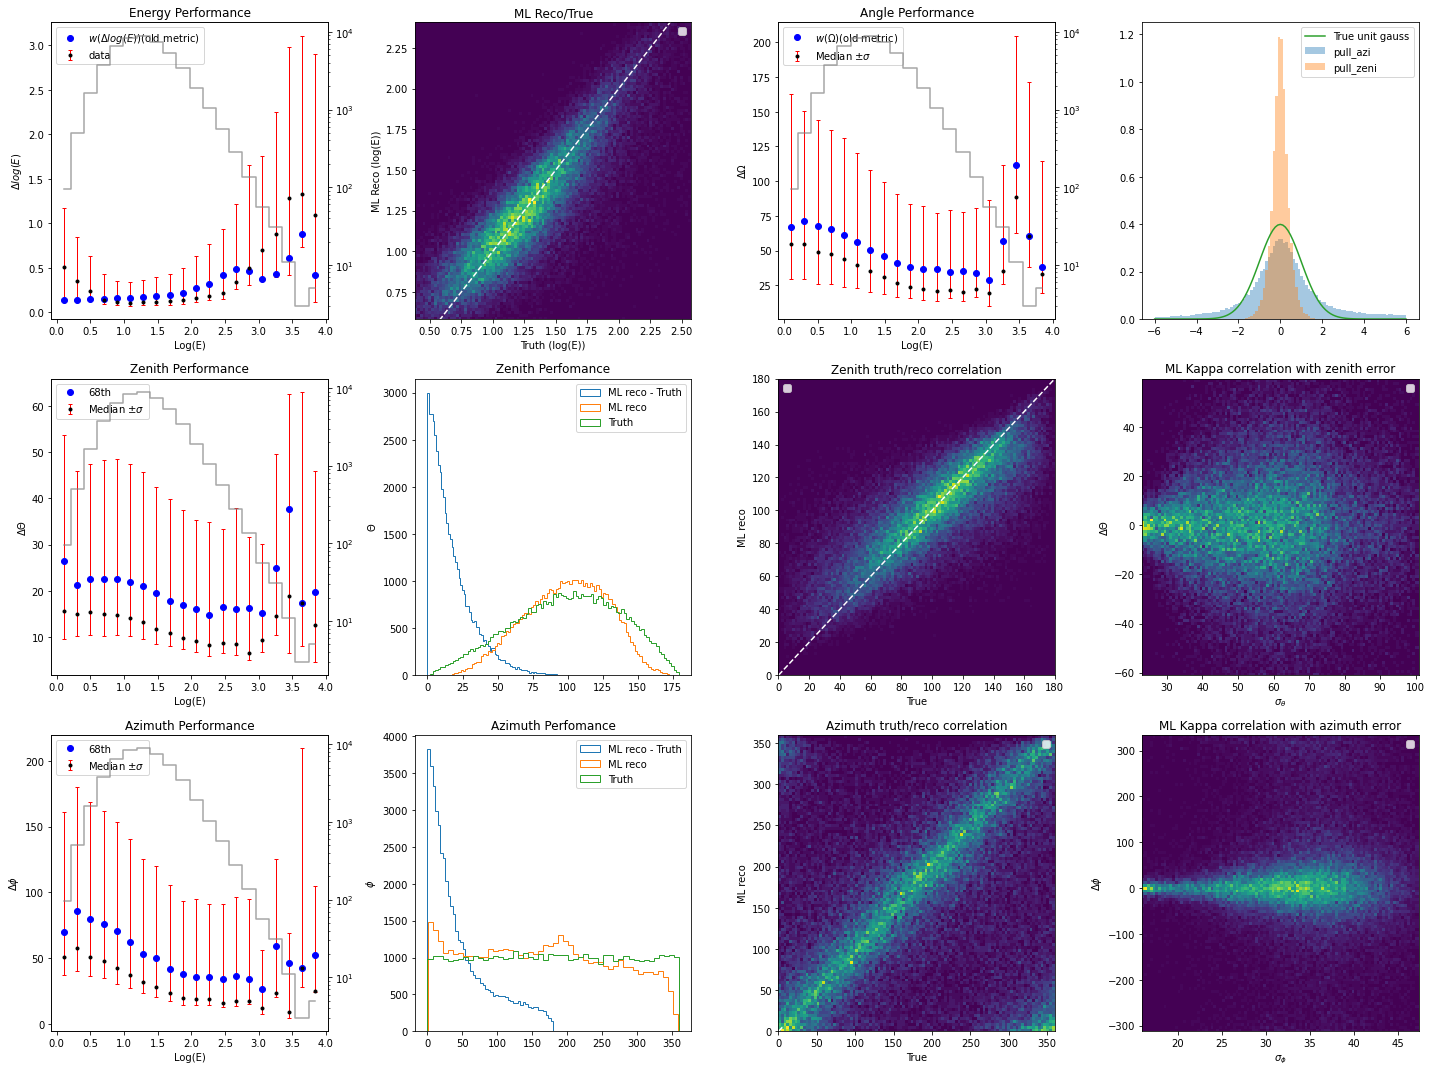

In [41]:
import dev.eval_model as em
reload(em)
performance_plot=em.performance_vM2D_sig
loader = DisjointLoader(dataset[:50000], batch_size=batch_size, epochs=1)
sigz=performance_plot(loader, test_step, metrics)

In [30]:
sigz

(<Figure size 1440x1080 with 16 Axes>,
 array([[<AxesSubplot:title={'center':'Energy Performance'}, xlabel='Log(E)', ylabel='$\\Delta log(E)$'>,
         <AxesSubplot:title={'center':'ML Reco/True'}, xlabel='Truth (log(E))', ylabel='ML Reco (log(E))'>,
         <AxesSubplot:title={'center':'Angle Performance'}, xlabel='Log(E)', ylabel='$\\Delta \\Omega$'>,
         <AxesSubplot:>],
        [<AxesSubplot:title={'center':'Zenith Performance'}, xlabel='Log(E)', ylabel='$\\Delta \\Theta$'>,
         <AxesSubplot:title={'center':'Zenith Perfomance'}, ylabel='$\\Theta$'>,
         <AxesSubplot:title={'center':'Zenith truth/reco correlation'}, xlabel='True', ylabel='ML reco'>,
         <AxesSubplot:title={'center':'ML Kappa correlation with zenith error'}, xlabel='$\\sigma_{\\theta}$', ylabel='$\\Delta \\Theta$'>],
        [<AxesSubplot:title={'center':'Azimuth Performance'}, xlabel='Log(E)', ylabel='$\\Delta \\phi$'>,
         <AxesSubplot:title={'center':'Azimuth Perfomance'}, ylabel='$\\ph